# Yelp Dataset Analysis

###Contents of this notebook:


####I. Introduction

####II. Data Preprocessing

####III. Exploratory Analysis

####IV. Predicting Stars

## I. Introduction

In this project, we are trying to learn and understand what influences the restaurant's success. Ambience, Service, Food quality, Location etc.

In machine learning techinques I've adopted in this notebook, you will see how we use various techniques and observe how well each of the models performs, and how different attributes impact a restaurant's success (measured by the stars of the restaurant). 
####- Random Forest Classifier
####- Decision Trees
####- KNN
####- SVM
####- Ridge Regression
####- Lasso Regression


We selected several typical models to demonstrate here. Our purpose is to understand what matters the most to restaurants.

Preprocessing and EDA
-----

This dataset contains restaurants in four states: Arizona, Georgia, Nevada, and Wisconsin.

The original dataset includes 42153 businesses, 320002 business attributes, 31617 check-in sets, 252898 users and 1125458 reviews.

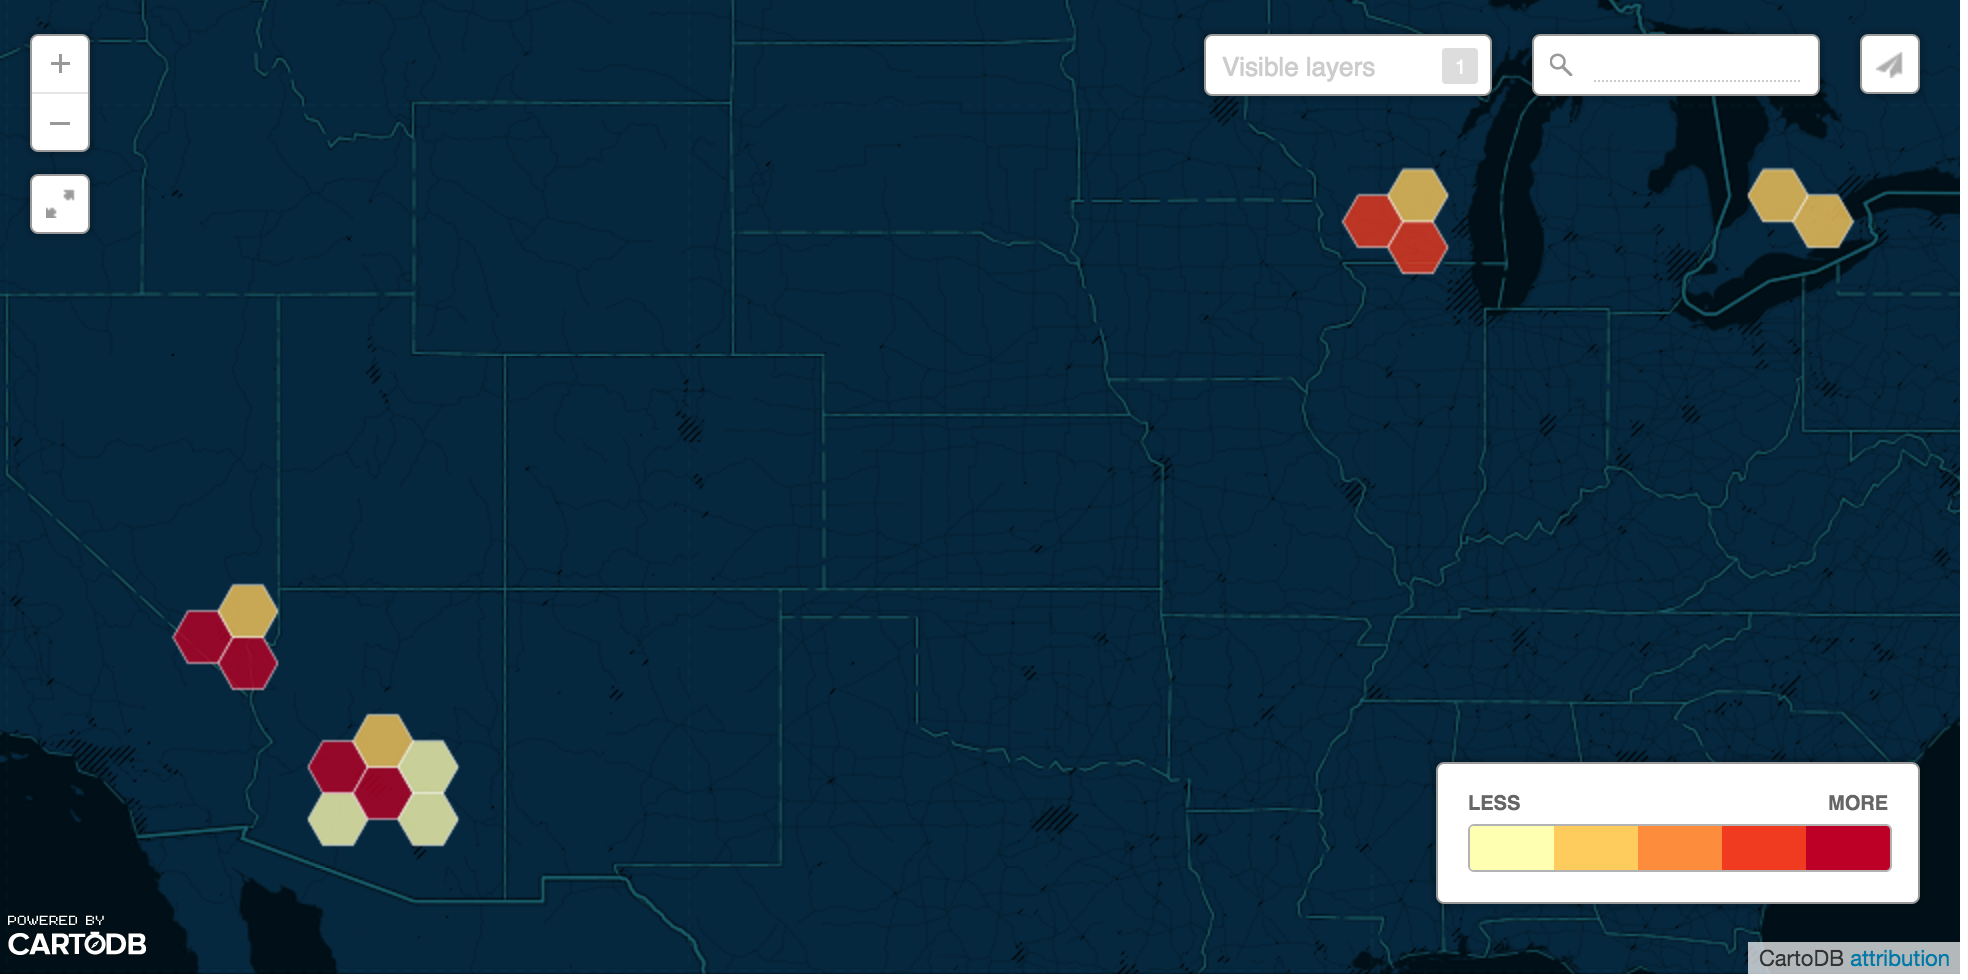

In [9]:
Image('1.png')

First, let's take a look at the restaurants in Greater Phoenix Area to have a general understanding of this dataset.

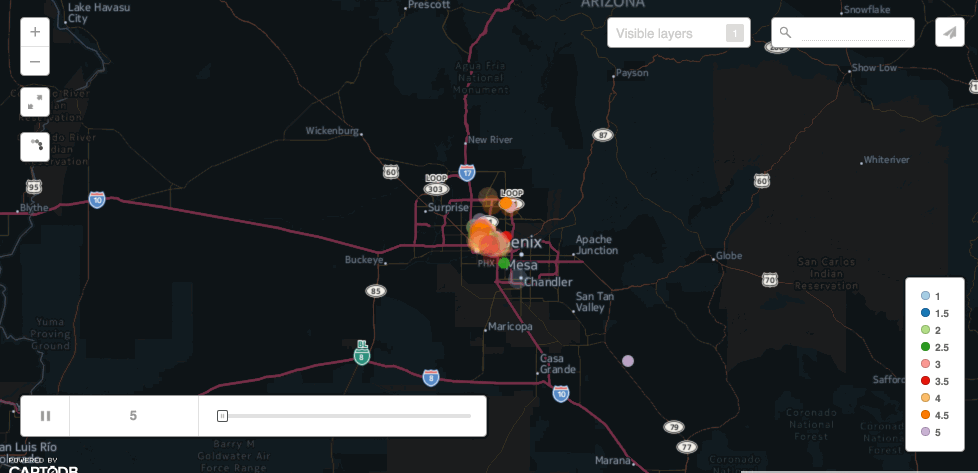

In [17]:
Image('2.png')

Exploratory  Analysis
---

In [ ]:
%matplotlib inline 
import json
import re
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cross_validation
import matplotlib.cm as cm
import matplotlib as mpl
from sklearn import tree
from sklearn import neighbors
from sklearn import linear_model
from sklearn import svm
from scipy.stats import mode
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from scipy.stats import mode
from itertools import combinations
import math
import time

In [116]:
print 'There are', dummy_c, 'dummy variables'
print 'and', len(other_categories), 'other variables'
hmm =dummy_c[1]+'\', \''+dummy_c[2]
long_word = ' '
for i in dummy_c:
    long_word = long_word+'\', \''+word

There are 69 dummy variables
and 63 other variables


In [118]:
cont = []
discr = []
for category in all_categories:
    if len(set(df[category]))<10:
        print category, ":", set(df[category])
        discr.append(category)
    else:
        cont.append(category)

stars : set([4.5, 3.5, 2.0, 3.0, 4.0, 5.0, 2.5, 1.0, 1.5])
state : set(['ON', 'EDH', 'MLN', 'WI', 'KHL', 'GA', 'AZ', 'NV'])
price : set([1.0, 2.0, 3.0, 4.0])
attire : set([0, 1, 2])
noise_level : set([0, 1, 2, 3])
smoking : set([0, 1, 2])
alcohol : set([0, 1, 2, 3])
wifi : set([0, 1, 2])


In [119]:
print len(cont)
np.array(cont)

55


array(['review_count', 'city', 'latitude', 'longitude', 'Thursday.open',
       'Friday.open', 'Tuesday.open', 'Monday.open', 'Friday.close',
       'Thursday.close', 'Saturday.open', 'Wednesday.close',
       'Monday.close', 'Tuesday.close', 'Saturday.close', 'Sunday.open',
       'Sunday.close', 'Wednesday.open', 'Weekdays', 'Weekends', 'Morning',
       'Afternoon', 'Evening', 'Midnight', 'Day0', 'Day1', 'Day2', 'Day3',
       'Day4', 'Day5', 'Day6', 'Hour00', 'Hour01', 'Hour02', 'Hour03',
       'Hour04', 'Hour05', 'Hour06', 'Hour07', 'Hour08', 'Hour09',
       'Hour10', 'Hour11', 'Hour12', 'Hour13', 'Hour14', 'Hour15',
       'Hour16', 'Hour17', 'Hour18', 'Hour19', 'Hour20', 'Hour21',
       'Hour22', 'Hour23'], 
      dtype='|S15')

1. 132 Veriables
2. 68 are 0/1 (Dummy)
3. Skewed toward 0, SInce only small restaurant serve all items.
4. 7 variables with multiple states.(Dummy)
5. 55 Continuous  categories (37 of those are review count splits during days/hours & 14 are open/close times.)
6. long,lat total review count. 
7. City 


Since we have more Discrete veriable we should choose Random Forest Clssifier.

### 2) restaurants attributes exploratory analysis

In [122]:
food = ['breakfast','brunch','lunch','gluten_free','soy_free','vegan','dairy_free','halhal','kosher','dinner','dessert','alcohol']
parking = ['parking_garage','parking_valet','parking_lot','parking_street']
ambience = ['attire','noise_level','smoking','kids','divey','classy','trendy','upscale','casual']
operate = ['happy_hour','reservation','delivery','latenight','open24','counter_order','BYOB','corkage','take_out',]
music = ['music_live','music_jukebox','music_background','music_dj',]
misc = ['price','credit_cards']
utilities = ['wifi','out_seat','TV','dogs_allowed','drive_thru','caters','karaoke','dancing','wheelchair_access',]

In [125]:
# Price vs Ratings
good_r = data[data.stars>=4]
expensive_r = good_rest[good_rest.price>=3]
cheap_r = good_rest[good_rest.price<3]
expense_proportion = float(len(expensive_r))/len(data[data.price>=3])
cheap_proportion  = float(len(cheap_r))/len(data[data.price<3])

print expensive_ratio,cheap_ratio

0.55790960452 0.366519299439


Expensive Restaurant's are corelated to Higher Rating


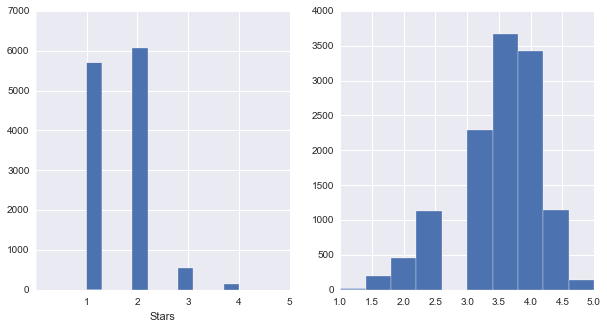

In [131]:
fig = plt.figure(figsize(10,5))
ax1 = fig.add_subplot(1,2,1)
ppl.hist(data.price.values)
ax1.set_xlabel('Price')
ax1.set_xlim(0,4)
ax1.set_xticks(range(1,5))

ax2 = fig.add_subplot(1,2,2)
ppl.hist(data.stars.values)
ax1.set_xlabel('Stars')
ax1.set_xlim(0,5)
ax1.set_xticks(range(1,6))

In [132]:
def price(x):
    fig = plt.figure(figsize(10,15))
    N =len(arr)
    for i in range(N):
        fig.add_subplot(3,(float(N)/3),i)
        ppl.hist(data[data[x[i]]==1].price.values)
        plt.title(x[i])
        plt.xlim(0,5)
        plt.xticks(range(1,5))

def ratings(x):
    fig = plt.figure(figsize(10,15))
    N =len(arr)
    for i in range(N):
        fig.add_subplot(3,(float(N)/3),i)
        ppl.hist(data[data[x[i]]==1].stars.values)
        plt.title(x[i])
        plt.xlim(0,6)
        plt.xticks(range(1,6))

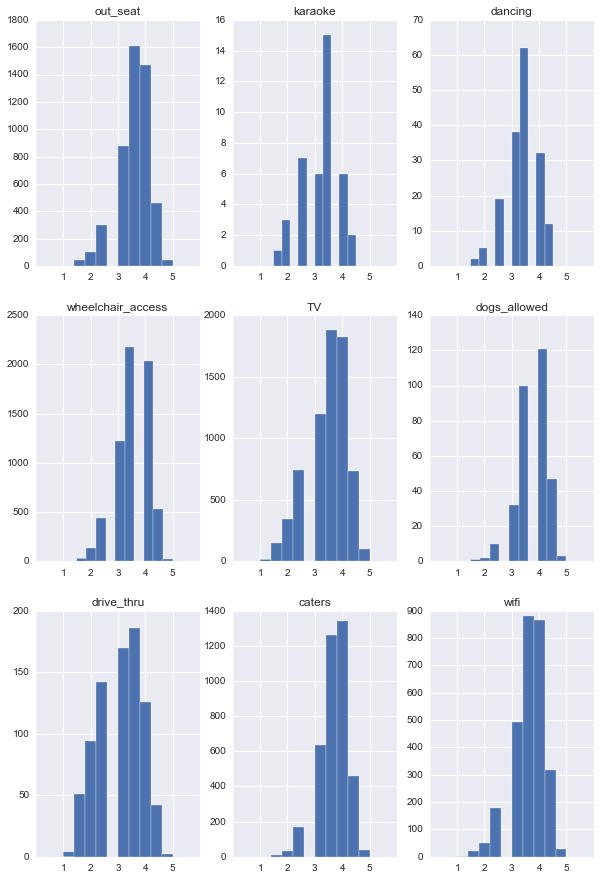

In [136]:
# Utilities vs ratings
ratings(utilities)

Wifi & Dogs_allowed restaurants have more stars on average.

### 3) business basic information exploratory analysis

Firstly, let's analyze popularity by categories .

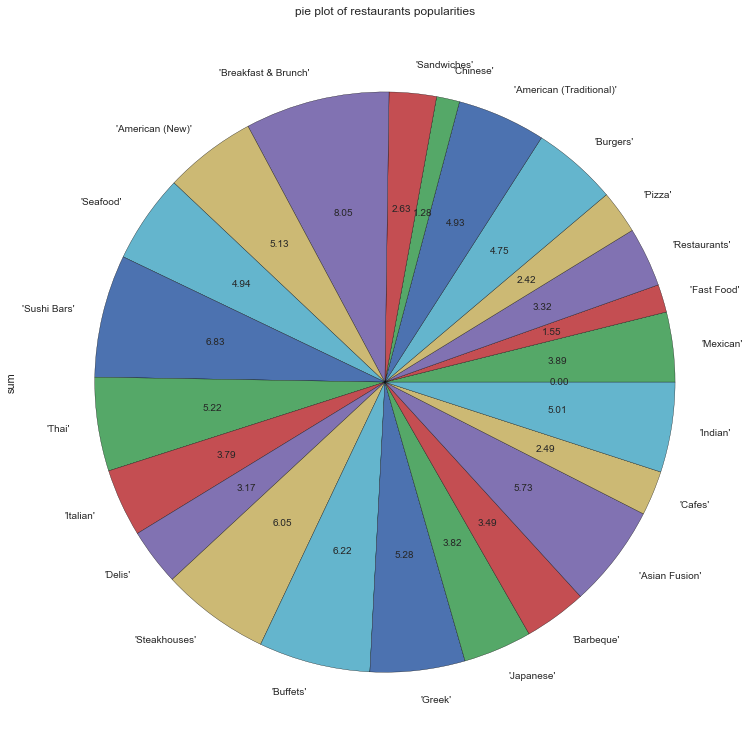

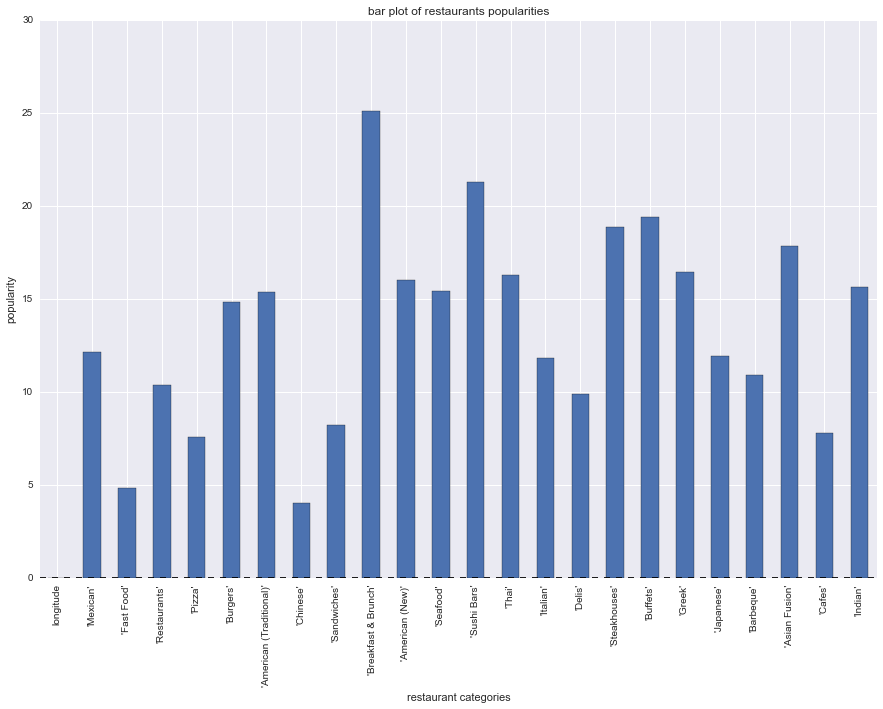

In [161]:
sub11=sub1.transpose()
sub11['sum']=sub11[0]+sub11[1]+sub11[2]+sub11[3]+sub11[4]
sub11=sub11[1:]
sub11['sum'].plot(kind='pie',autopct='%.2f',figsize=(13,13))
plt.title('pie plot of restaurants popularities')
plt.show()
plt.figure(figsize=(15,10))
sub11['sum'].plot(kind='bar')
plt.xlabel('cuisin/rest categories')
plt.ylabel('popularity')
plt.title('restaurants popularities')
plt.show()

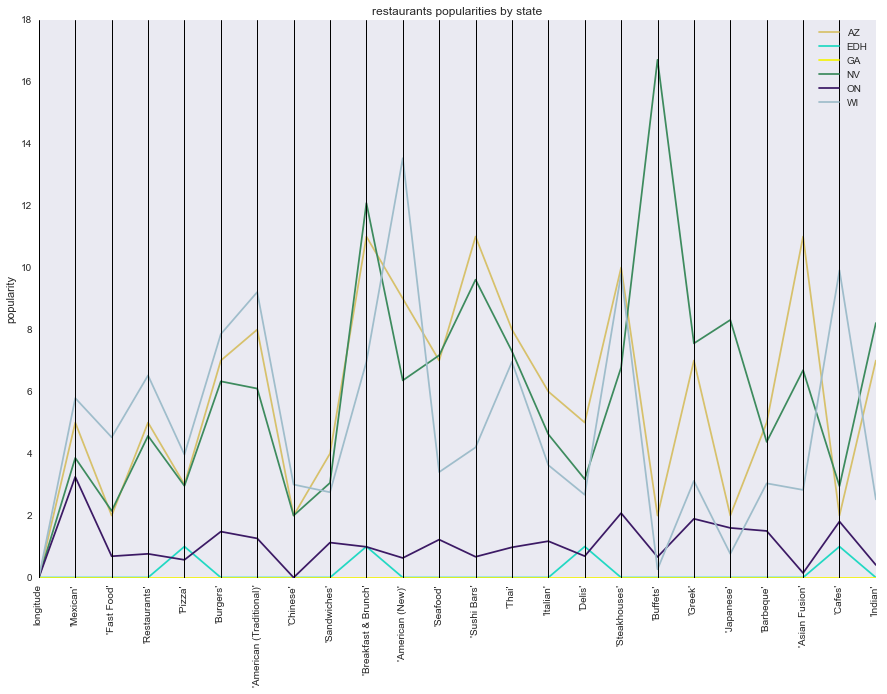

In [162]:
plt.figure(figsize=(15,10))
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(sub1,'state')
plt.xticks(rotation=90)
plt.ylabel('popularity')
plt.title('restaurants popularities by state')
plt.show()

In [ ]:
Nevada has Buffet more popular. `

Secondly, let's analyze categories popularity by time period.

In [163]:
sub2=pd.DataFrame()
sub2['time']=['Morning','Afternoon','Evening','Midnight']
for i in range(0,len(categories)):
    sub2[categories[i]]=0
    a=sub[sub[categories[i]]==1]
    sub2[categories[i]][0]=sum(a['Morning'])
    sub2[categories[i]][1]=sum(a['Afternoon'])
    sub2[categories[i]][2]=sum(a['Evening'])
    sub2[categories[i]][3]=sum(a['Midnight'])
sub2=sub2.replace('NaN', 0)
sub22=sub2.transpose()
sub22.rename(columns={0: 'Morning',1:'Afternoon',2:'Evening',3:'Midnight'},inplace=True)
sub22=sub22[1:]
sub22.head()

-c:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Morning Afternoon Evening Midnight
longitude           0         0       0        0
'Mexican'       25894     58457   71689     6036
'Fast Food'     10472     21894   22157     5390
'Restaurants'    7196     22188   49155     2718
'Pizza'          5749     20360   31639     4014

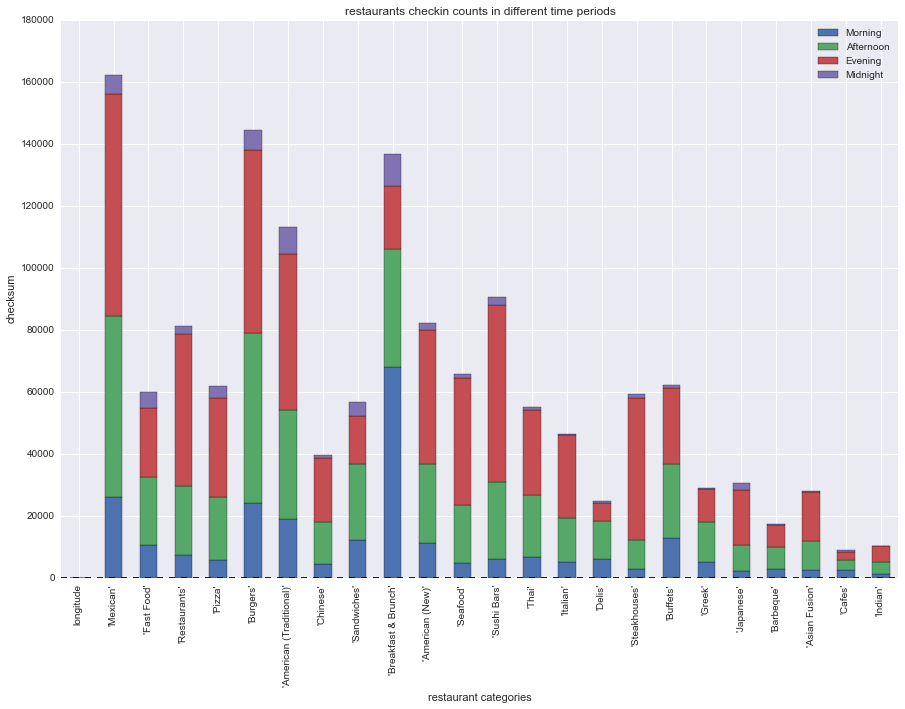

In [164]:
sub22.plot(kind='bar', stacked=True,figsize=(15,10))
plt.xlabel('restaurant categories')
plt.ylabel('checksum')
plt.title('restaurants checkin counts in different time periods')
plt.show()

Thirdly, let's analyze the relationship between popularity and stars.

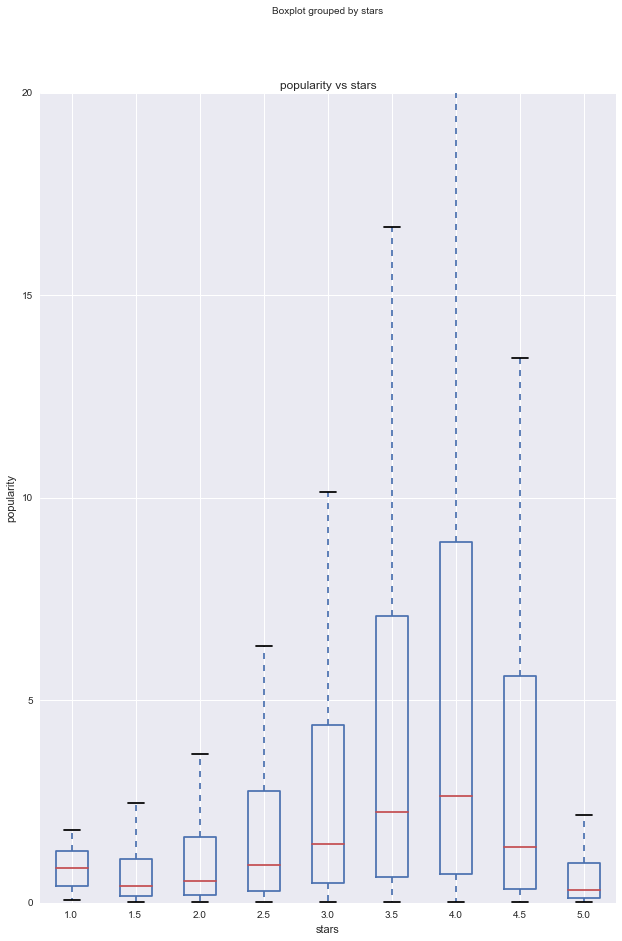

In [165]:
sub.boxplot('popularity', by = 'stars')
plt.ylabel('popularity')
plt.ylim(0,20)
plt.title('popularity vs stars')
plt.show()

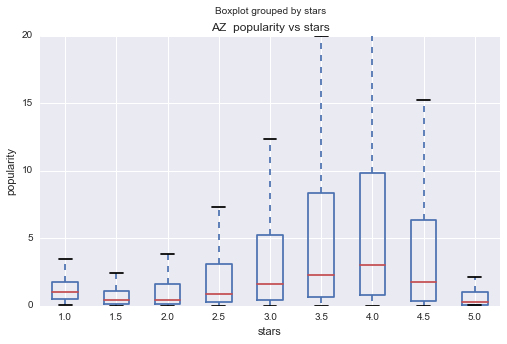

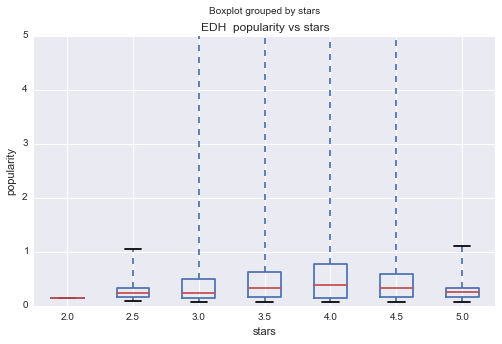

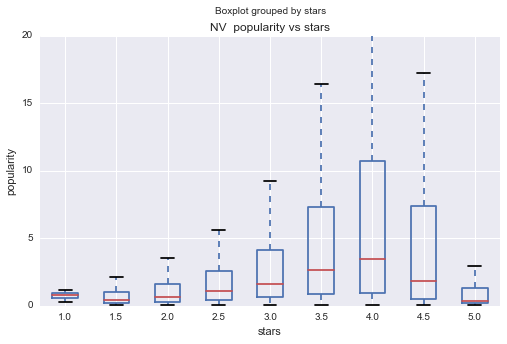

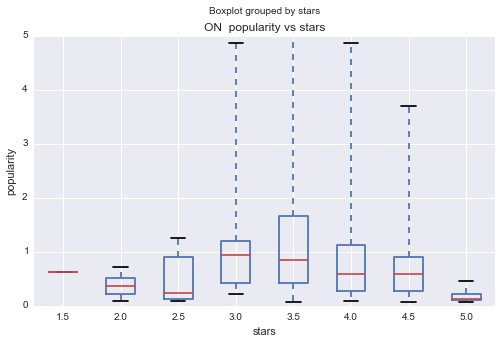

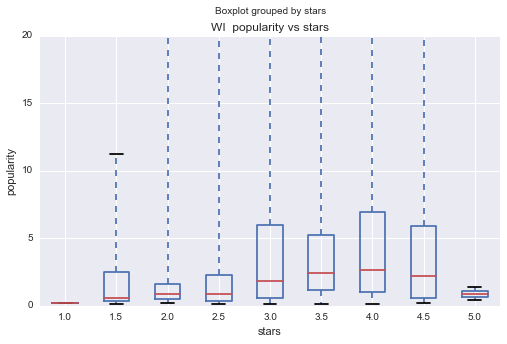

In [168]:
a=sub[sub.state==state[0]]
a.boxplot('popularity', by = 'stars',figsize=(8,5))
plt.ylabel('popularity')
plt.ylim(0,20)
plt.title(state[0]+'  popularity vs stars')
plt.show()

a=sub[sub.state==state[1]]
a.boxplot('popularity', by = 'stars',figsize=(8,5))
plt.ylabel('popularity')
plt.ylim(0,5)
plt.title(state[1]+'  popularity vs stars')
plt.show()

a=sub[sub.state==state[3]]
a.boxplot('popularity', by = 'stars',figsize=(8,5))
plt.ylabel('popularity')
plt.ylim(0,20)
plt.title(state[3]+'  popularity vs stars')
plt.show()

a=sub[sub.state==state[4]]
a.boxplot('popularity', by = 'stars',figsize=(8,5))
plt.ylabel('popularity')
plt.ylim(0,5)
plt.title(state[4]+'  popularity vs stars')
plt.show()

a=sub[sub.state==state[5]]
a.boxplot('popularity', by = 'stars',figsize=(8,5))
plt.ylabel('popularity')
plt.ylim(0,20)
plt.title(state[5]+'  popularity vs stars')
plt.show()

***

Part II Construction and Validation of the Model
----

Model Used:
    ---

### 1) Random Forest Classifier

Fitting the data using Random Forest Classifier because it can handle correlated random variables, and the number of stars can be viewed as a categorical variable.

In [211]:
from sklearn.cross_validation import cross_val_score

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc

import seaborn as sns

data = pd.read_csv("cleaned_data/clean_combined.csv")
data.head()

Unnamed: 0                         name             business_id  open  \
0           0         Pine Cone Restaurant  JwUE5GmEO-sH1FuwJgKBlQ  True   
1           1   Deforest Family Restaurant  uGykseHzyS5xAMWoN6YUqA  True   
2           2                     Culver's  LRKJF43s9-3jG9Lgx4zODg  True   
3           3  Chang Jiang Chinese Kitchen  RgDg-k9S5YD_BaxMckifkg  True   
4           4     Green Lantern Restaurant  rdAdANPNOcvUtoFgcaY9KA  True   

   stars  review_count state        city  \
0    4.0            26    WI   De Forest   
1    4.0            16    WI   De Forest   
2    4.5             7    WI   De Forest   
3    4.0             3    WI   De Forest   
4    3.5            33    WI  Mc Farland   

                                full_address   latitude  longitude  Mexican  \
0  6162 US Highway 51\r\nDe Forest, WI 53532  43.238893 -89.335844        0   
1      505 W North St\r\nDe Forest, WI 53532  43.252267 -89.353437        0   
2    4910 County Rd V\r\nDe Forest, WI 53532  43.251045 -89.374983        0   
3       631 S Main St\r\nDe Forest, WI 53532  43.240875 -89.343722        0   
4  4412 Siggelkow Rd\r\nMc Farland, WI 53558  43.025644 -89.306134        0   

   Fast Food  Restaurants  Pizza  Burgers  American (Traditional)  Chinese  \
0          0            1      0        0                       0        0   
1          0            0      0        0                       1        0   
2          0            0      0        0                       0        0   
3          0            0      0        0                       0        1   
4          0            0      0        0                       1        0   

   Sandwiches  Breakfast & Brunch  American (New)  Seafood  Sushi Bars  Thai  \
0           0                   0               0        0           0     0   
1           0                   0               0        0           0     0   
2           0                   0               0        0           0     0   
3           0                   0               0        0           0     0   
4           0                   0               0        0           0     0   

   Italian  Delis  Steakhouses  Buffets  Greek  Japanese  Barbeque  \
0        0      0            0        0      0         0         0   
1        0      0            0        0      0         0         0   
2        0      0            0        0      0         0         0   
3        0      0            0        0      0         0         0   
4        0      0            0        0      0         0         0   

   Asian Fusion  Cafes  Indian  Korean  price  casual  attire  noise_level  \
0             0      0       0       0      1       0       0            0   
1             0      0       0       0      1       1       0            1   
2             0      0       0       0      1       1       0            0   
3             0      0       0       0      2       1       0            0   
4             0      0       0       0      2       0       0            0   

   smoking  kids  breakfast  lunch  dinner  alcohol  parking_lot  \
0        0     0          0      0       0        0            0   
1        0     0          0      1       0        1            0   
2        0     1          0      0       0        1            0   
3        0     1          0      0       0        1            1   
4        0     0          0      1       1        2            0   

   parking_garage  wifi  out_seat  wheelchair_access  drive_thru  caters  \
0               0     0         0                  0           0       0   
1               0     0         0                  0           0       0   
2               0     1         0                  1           0       0   
3               0     0         0                  0           0       0   
4               0     1         0                  1           0       0   

   happy_hour  take_out  reservation  delivery  Thursday.open  Friday.open  \
0           0         

#### Search for optimal criterion and optimal number of trees

(0.24, 0.4)

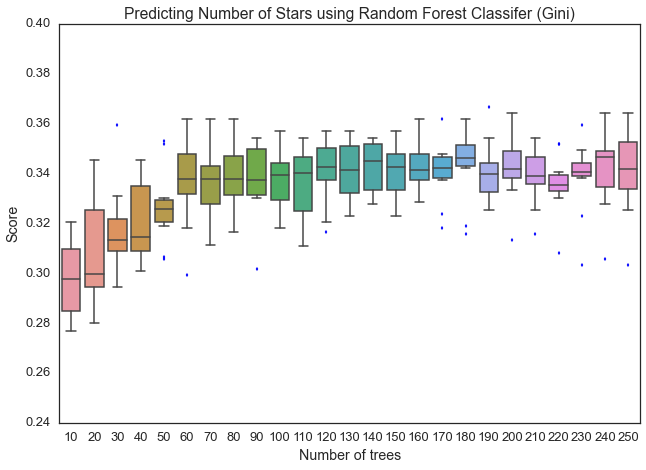

In [227]:
sns.set_context("talk")
sns.set_style("white")

sns.boxplot(np.transpose(stars_gini))
plt.xlabel("Number of trees")
plt.ylabel("Score")
plt.title("Predicting Number of Stars using Random Forest Classifer (Gini)")
plt.xticks(range(1,len(n_estimators)+1),n_estimators)
plt.ylim(0.24,0.4)

([<matplotlib.axis.XTick at 0x132a63350>,
 <a list of 25 Text xticklabel objects>)

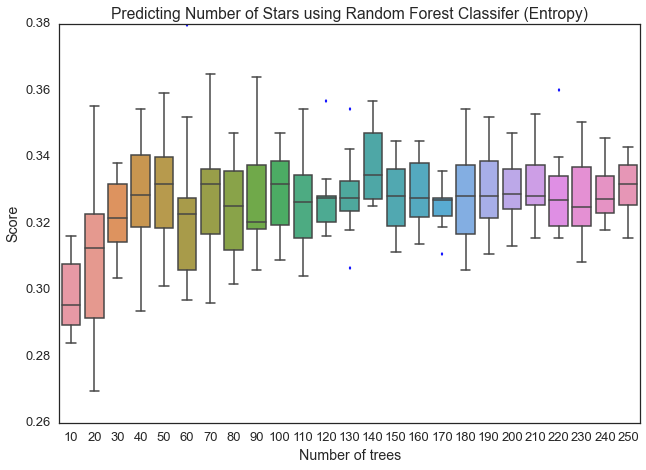

In [228]:
sns.boxplot(np.transpose(stars_entropy))
plt.xlabel("Number of trees")
plt.ylabel("Score")
plt.title("Predicting Number of Stars using Random Forest Classifer (Entropy)")
plt.xticks(range(1,len(n_estimators)+1),n_estimators)

 An alternative for Y:
 ---

Consider restauraunts have more than 4 stars as "successful"

predict successful restaurants and search for optimal criterion and optimal number of trees

([<matplotlib.axis.XTick at 0x131930350>,
 <a list of 25 Text xticklabel objects>)

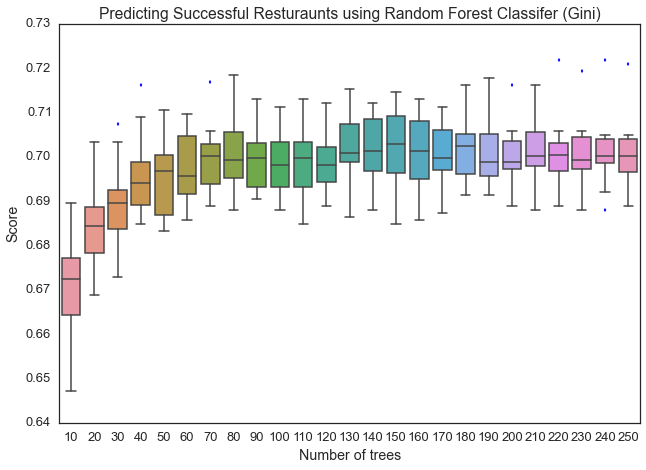

In [232]:
sns.boxplot(np.transpose(success_gini))
plt.xlabel("Number of trees")
plt.ylabel("Score")
plt.title("Predicting Successful Resturaunts using Random Forest Classifer (Gini)")
plt.xticks(range(1,len(n_estimators)+1),n_estimators)

([<matplotlib.axis.XTick at 0x14084c1d0>,
 <a list of 25 Text xticklabel objects>)

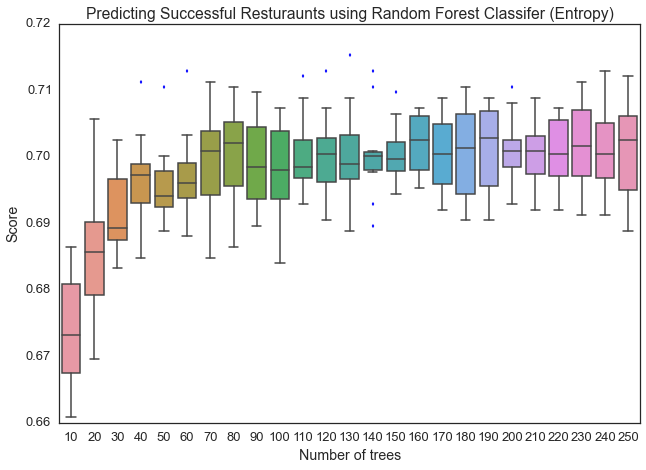

In [233]:
sns.boxplot(np.transpose(success_entropy))
plt.xlabel("Number of trees")
plt.ylabel("Score")
plt.title("Predicting Successful Resturaunts using Random Forest Classifer (Entropy)")
plt.xticks(range(1,len(n_estimators)+1),n_estimators)

#### Search for optimal cutting value

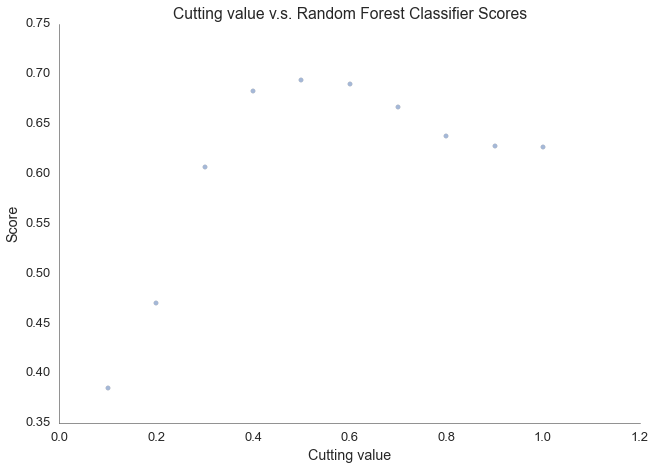

In [235]:
def optimal_cut(alpha,features = range(10,110)):
    X = data.ix[:,features]
    Y = data.success

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

    clf = rfc(random_state=0,max_features = 'log2',n_estimators=180,criterion="gini")

    clf.fit(X_train,y_train)
    probs = clf.predict_proba(X_test)[:,1]
    y_pred = probs>alpha
    accuracy = np.mean(y_pred==y_test) 
    return accuracy

scores_cut = []

for i in arange(0.1,1.1,0.1):
    scores_cut.append(cut(i))

    
fig, ax = plt.subplots()
ppl.scatter(ax,arange(0.1,1.1,0.1),scores_cut)

ax.legend()
ax.set_xlabel("Cutting value")
ax.set_ylabel("Score")
ax.set_title("Cutting value v.s. Random Forest Classifier Scores")

### Summary for Random Forest Classifier:

We searched for optimal criterion, and optimal number of trees for Random Forest Classifier. From the above analysis, we can tell that an optimal number of trees is around 160, while using criterion "gini" or "entropy" does not make many differences. The overall predicting score is around 0.32. Since the proportion of 3 stars restaurants is about 29%, so the model is not doing any better than random guessing.

KNN


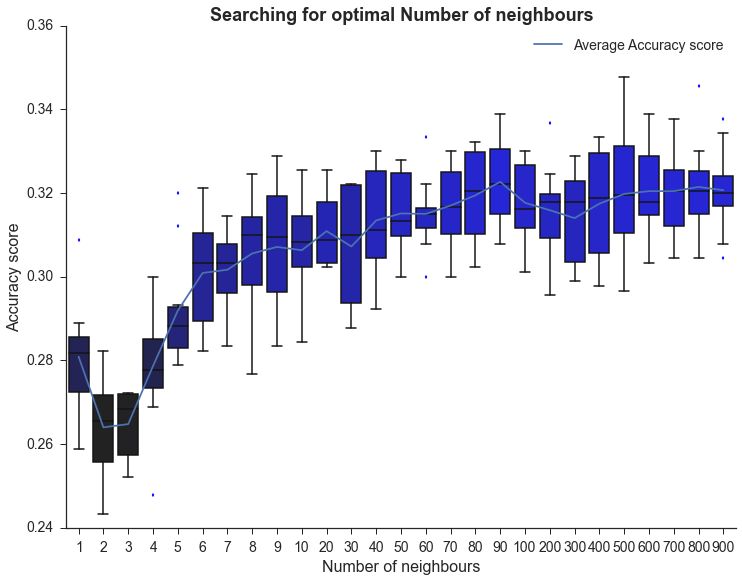

In [55]:
n_neighbors = range(1,10)+ [x*10 for x in range(1,10)] + [x*100 for x in range(1,10)]
summary(neighbors.KNeighborsClassifier(), n_neighbors, data_n)

### 4) Logistic regression

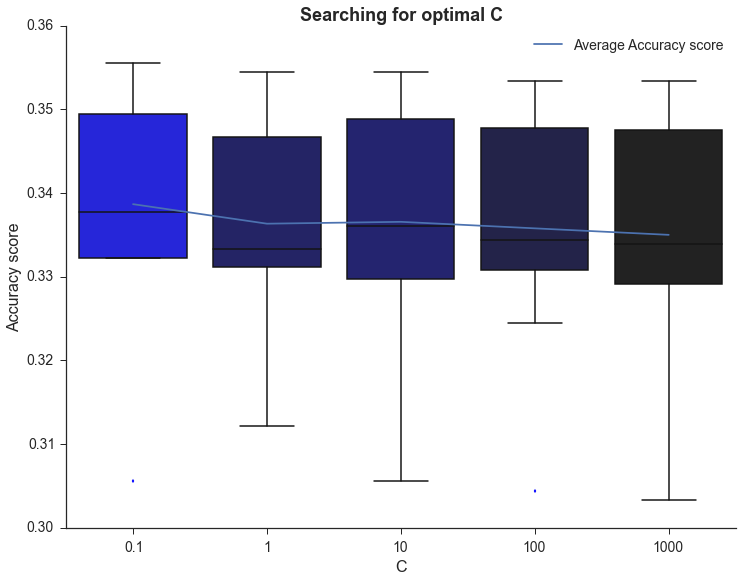

In [57]:
summary(linear_model.LogisticRegression(), [0.1,1,10,100,1000], data_n)   

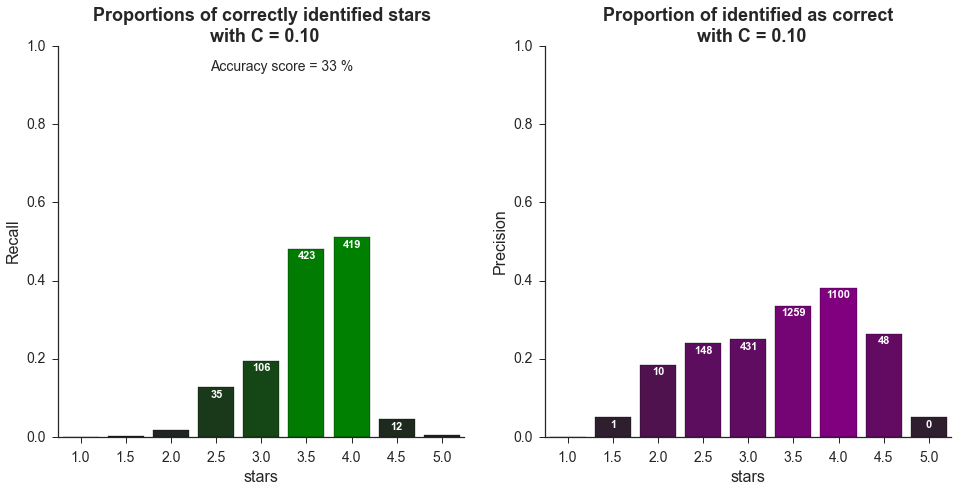

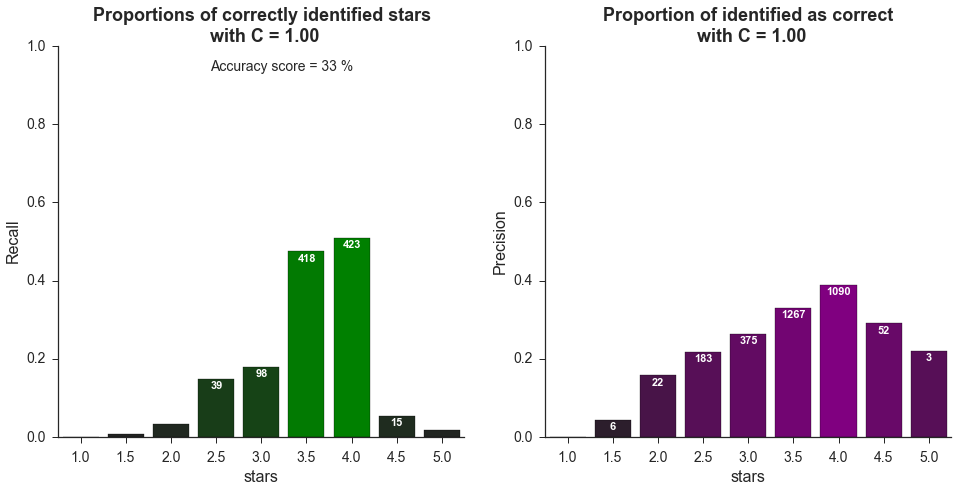

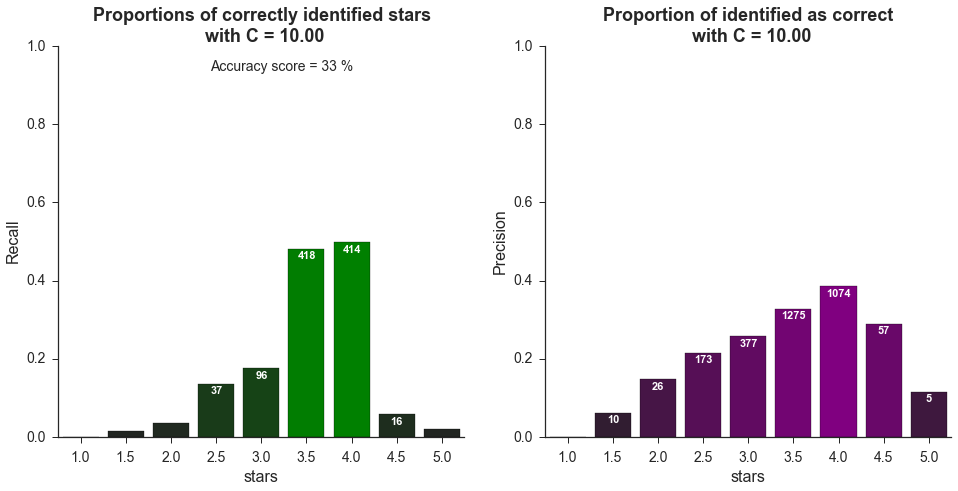

In [58]:
for C in [0.1,1,10]:
    
    title1 = 'Proportions of correctly identified stars \n with C = %.2f' % C
    title2 = 'Proportion of identified as correct \n with C = %.2f' % C
       
    titles = [title1, xlab, ylab1, title2, xlab, ylab2]
    proportions_C = get_proportions_cv(linear_model.LogisticRegression(C=C), data_n, 10, regression = False)
    
    bar_plot(proportions_C, titles)

### 5) SVM

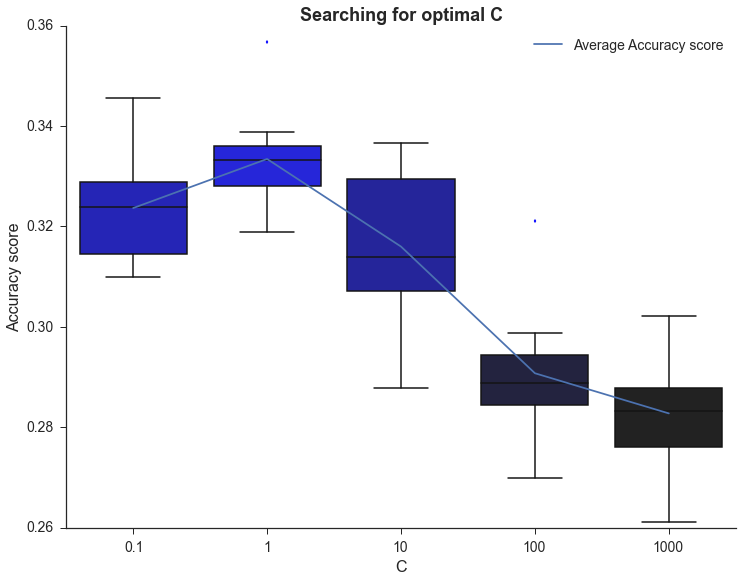

In [59]:
summary(svm.SVC(), [0.1,1,10,100,1000], data_n)   

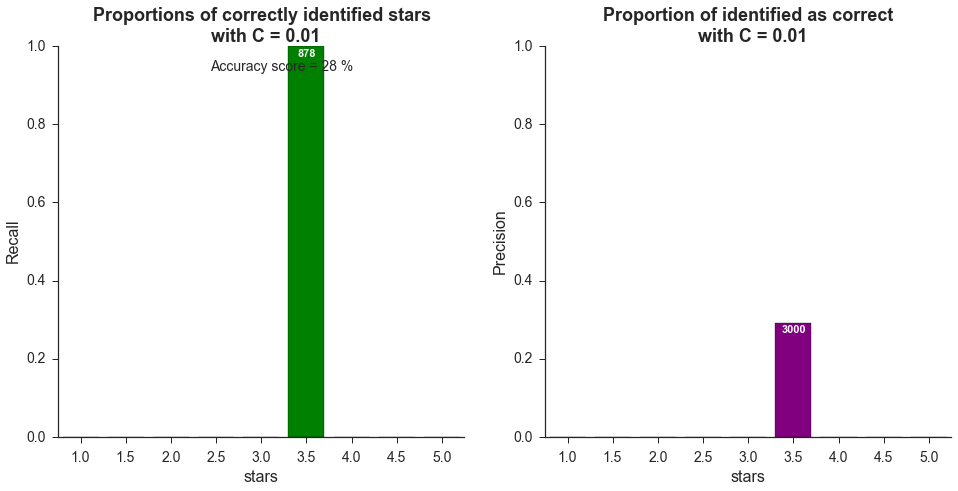

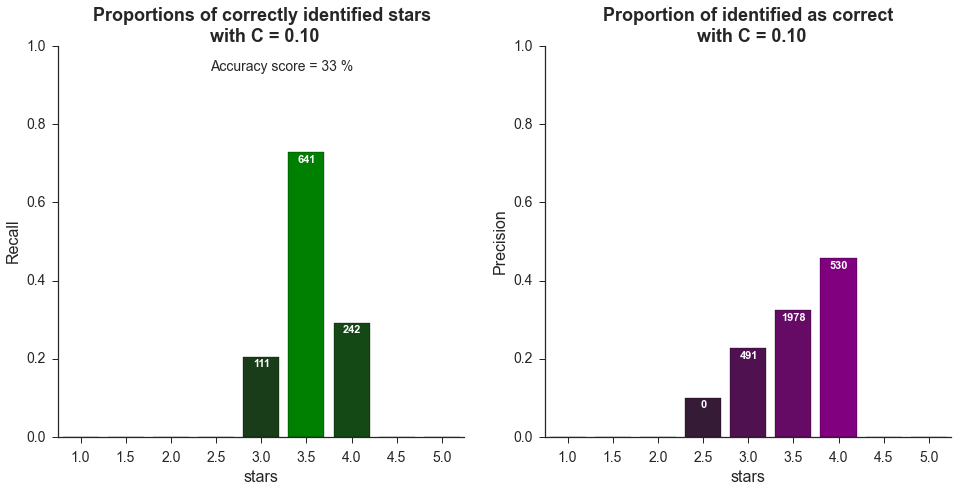

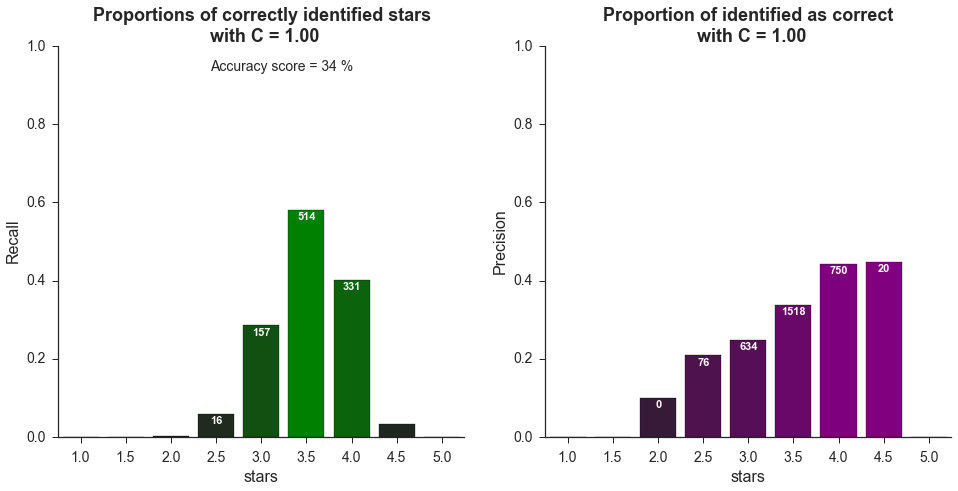

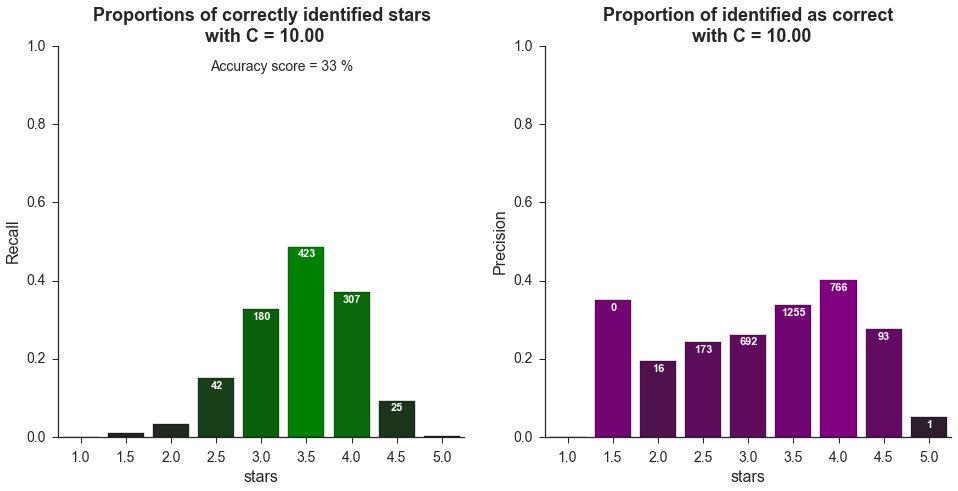

In [60]:
for C in [0.01,0.1,1,10]:

    proportions_C_SVM = get_proportions_cv(svm.SVR(C=C), data_n, 10, regression = True)

    title1 = 'Proportions of correctly identified stars \n with C = %.2f' % C
    title2 = 'Proportion of identified as correct \n with C = %.2f' % C

    titles = [title1, xlab, ylab1, title2, xlab, ylab2]

    bar_plot(proportions_C_SVM, titles)

### 7) Lasso Regression

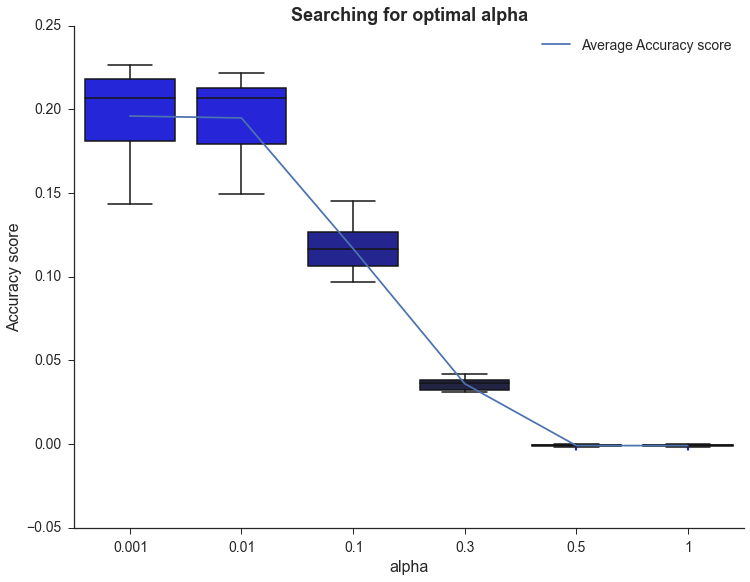

In [65]:
summary(Lasso(), [0.001,0.01,0.1,0.3,0.5,1], data_n) 
# at alpha=0 Lasso becomes simple OLS. Looks like OLS would be the best here

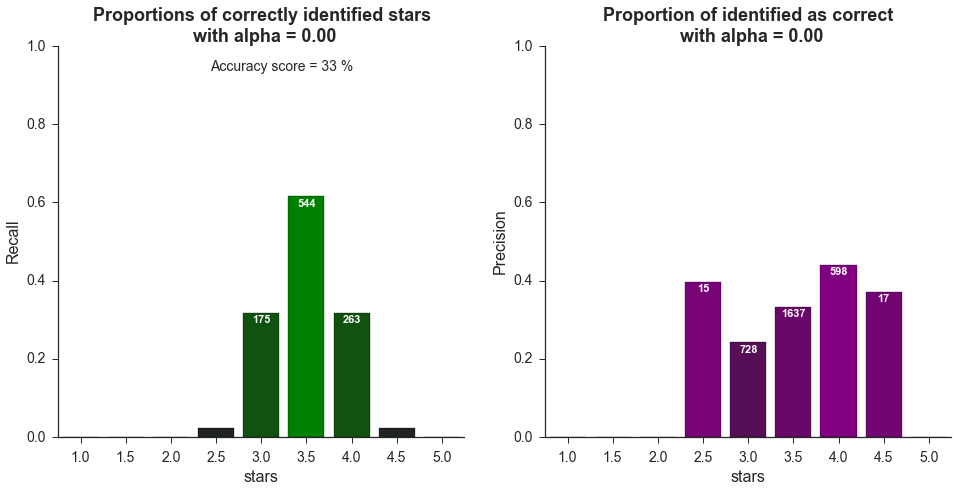

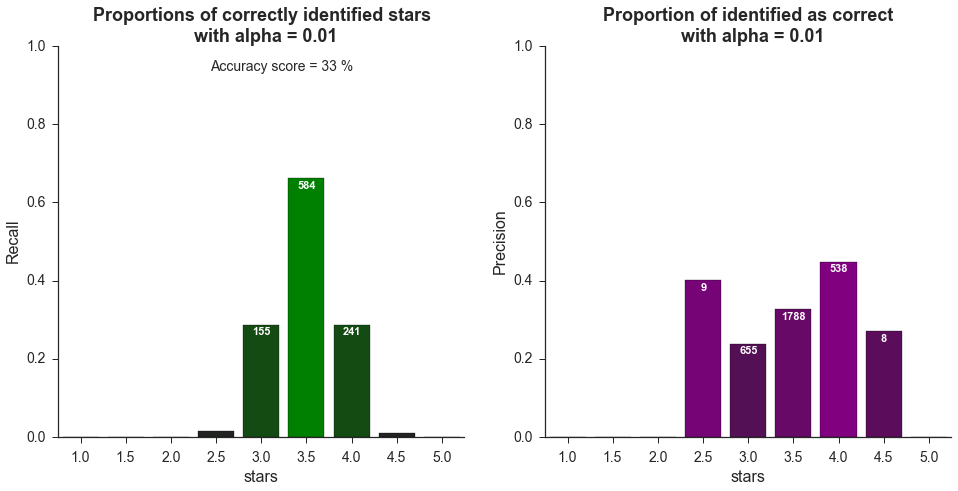

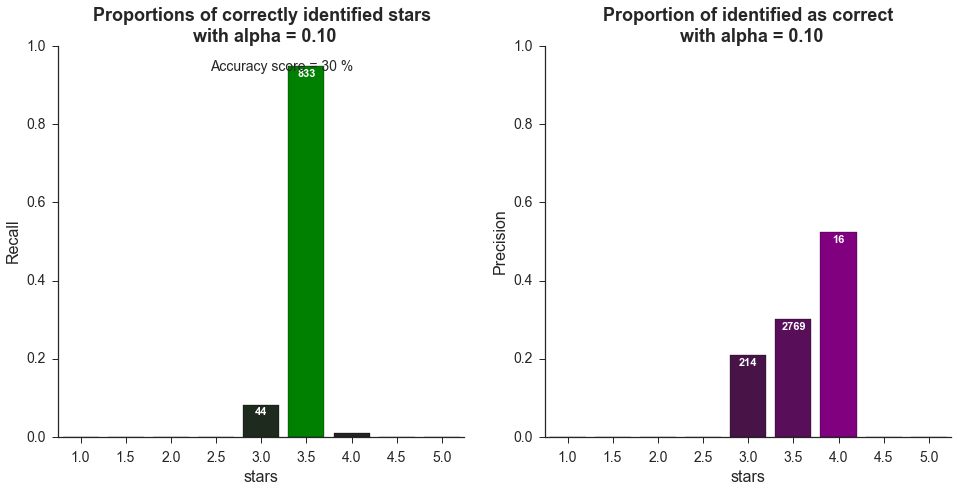

In [66]:
for alpha in [0.001,0.01,0.1]:
    
    proportions_lasso = get_proportions_cv(Lasso(alpha=alpha), data_n, 10, regression = True)   
    
    title1 = 'Proportions of correctly identified stars \n with alpha = %.2f' % alpha
    title2 = 'Proportion of identified as correct \n with alpha = %.2f' % alpha
    
    titles = [title1, xlab, ylab1, title2, xlab, ylab2]

    bar_plot(proportions_lasso, titles)

Feature importance investigation

In [35]:
features = Lasso(alpha=0.03).fit(data_n['train x'], data_n['train y']).sparse_coef_

In [36]:
np.array([data_n['train x'].columns[x] for x in features.indices]) # This is what Lasso thinks is important.

array(['review_count', 'Mexican', 'Fast Food', 'Restaurants', 'Pizza',
       'Burgers', 'American (Traditional)', 'Chinese', 'Sandwiches',
       'Breakfast & Brunch', 'Thai', 'Delis', 'Buffets', 'Greek',
       'Barbeque', 'classy', 'kids', 'brunch', 'dessert', 'parking_lot',
       'parking_street', 'parking_garage', 'drive_thru', 'caters',
       'happy_hour', 'delivery', 'music_live', 'music_dj', 'credit_cards',
       'MLN', 'WI', 'longitude', 'price', 'attire', 'noise_level',
       'late close', 'late close weekend', 'ever closed',
       'Weekends portion', 'Evening portion', 'hours collapsed1',
       'days collapsed', 'missing times'], 
      dtype='|S22')

Lasso important features differ from random forest important features. If i try to use random forest top 20 features, seems like I am 
not loosing anything out, in terms of accuracy. 

Also, notice that most of the top features are actually engineered and were not there by default.

The features we used to fit in the model are all physical descriptions of restaurants, while the restaurants are evaluated very subjectively by users. And this might be the reason why those models perform below our expectation. In other words, if all models are not doing well, then we should question the data.

Luckily, we have the review data for each restaurant. The review data contains information about subjective evaluations from users.In the part we will use review data to predict restaurant stars by adopting test analysis techniques, of which the predicting power outperformed all other features.